In [25]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy import stats
from scipy.io import loadmat
from sklearn.cluster.bicluster import SpectralBiclustering, SpectralCoclustering
from scipy.spatial.distance import* 

import cPickle
from math import*

In [2]:
z_scores = np.load('raw_z_npdump.dump')
print len(z_scores), len(z_scores[0])

64 3383768


In [42]:
length_of_intervals = 10000
channels = 63
edges = 2016
total_interval = len(z_scores[0])/length_of_intervals + 1
channels_data = [[None for j in range(edges)] for i in range(total_interval)]
# avg = []
# std_dev = []
# for i in range(channels):
#     avg.append(np.mean(z_scores[i]))
#     std_dev.append(np.std(z_scores[i]))
# print avg
# print std_dev

In [32]:
# print cosine_similarity(z_scores[0], z_scores[0])
# print cosine(z_scores[0], z_scores[0])
# print euclidean(z_scores[0], z_scores[1])
# print cityblock(z_scores[0], z_scores[1])
# print -correlation(z_scores[0], z_scores[0]) +1, -correlation(z_scores[0], z_scores[1]) +1
# print pearsonr(z_scores[0], z_scores[0]), pearsonr(z_scores[0], z_scores[1])

0.999996983843 0.421604085646
(1.0, 0.0) (0.42160422, 0.0)


In [43]:
def calculate_cos(interval):
    index_counter = 0
    j = length_of_intervals * interval
    for start in range(channels):
        for index in range(channels):
            if start <= index:
                if interval != total_interval:
                    channels_data[interval][index_counter] = -cosine(z_scores[start][j:j+length_of_intervals],
                                                                    z_scores[index][j:j+length_of_intervals]) + 1
                else:
                    channels_data[interval][index_counter] = -cosine(z_scores[start][j:],
                                                                    z_scores[index][j:]) +1
                index_counter += 1
    print index_counter

In [44]:
for i in range(total_interval):
    print 'Calculating Interval %s' % i,
    calculate_cos(i)

Calculating Interval 0 2016
Calculating Interval 1 2016
Calculating Interval 2 2016
Calculating Interval 3 2016
Calculating Interval 4 2016
Calculating Interval 5 2016
Calculating Interval 6 2016
Calculating Interval 7 2016
Calculating Interval 8 2016
Calculating Interval 9 2016
Calculating Interval 10 2016
Calculating Interval 11 2016
Calculating Interval 12 2016
Calculating Interval 13 2016
Calculating Interval 14 2016
Calculating Interval 15 2016
Calculating Interval 16 2016
Calculating Interval 17 2016
Calculating Interval 18 2016
Calculating Interval 19 2016
Calculating Interval 20 2016
Calculating Interval 21 2016
Calculating Interval 22 2016
Calculating Interval 23 2016
Calculating Interval 24 2016
Calculating Interval 25 2016
Calculating Interval 26 2016
Calculating Interval 27 2016
Calculating Interval 28 2016
Calculating Interval 29 2016
Calculating Interval 30 2016
Calculating Interval 31 2016
Calculating Interval 32 2016
Calculating Interval 33 2016
Calculating Interval 34 

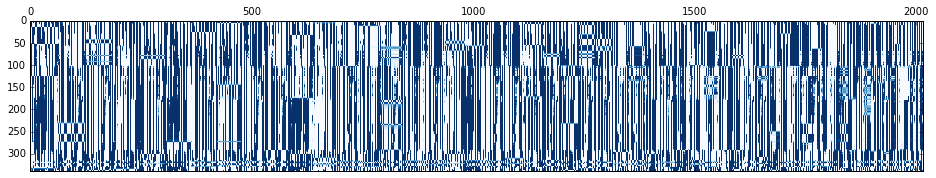

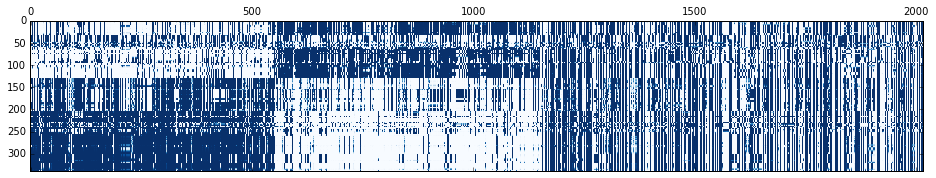

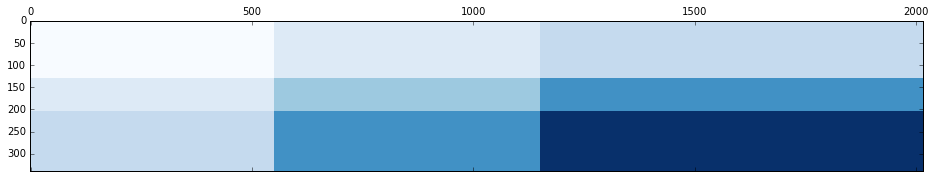

In [106]:
pearson_data = np.array(channels_data)
spectral_model = SpectralBiclustering()
spectral_model.fit(pearson_data)
fit_data = pearson_data[np.argsort(spectral_model.row_labels_)]
fit_data = fit_data[:, np.argsort(spectral_model.column_labels_)]
plt.matshow(pearson_data, cmap=plt.cm.Blues)
plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.matshow(np.outer(np.sort(spectral_model.row_labels_)+1,
                     np.sort(spectral_model.column_labels_)+1),
                     cmap = plt.cm.Blues)
plt.show()

In [46]:
import json as simplejson
with open('media/cos_z_score_10s_2016.json', 'w+') as f:
    p = [[float(column) for column in row] for row in pearson_data]
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': p}))

with open('media/sorted_cos_z_score_10s_2016.json', 'w+') as f:
    p = [[float(column) for column in row] for row in fit_data]
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': p}))

In [48]:
print channels_data[1]

[0.99999999153120755, 0.97576594836013486, 0.9705439597139317, 0.97304052987722978, -0.96166952694385111, 0.9684428506455236, 0.97028234259149126, 0.96446242100078838, -0.9619736660656788, -0.96232715164731597, -0.96109839147833886, -0.95120403013002441, 0.97290314770210429, -0.95534665143437625, -0.8842874303872934, -0.96227407496935147, -0.96219858063774488, -0.96094884964639404, 0.97456764608846458, -0.96389341520750005, -0.96148478073063792, 0.94887356424976843, -0.96266437081945933, -0.96078526518247687, -0.94770198672417738, 0.96845045146718867, 0.97464420186585765, 0.96882514693831445, 0.96851897777788698, -0.96039888459044809, 0.9693902881156099, 0.97399841829208367, 0.97398101621562716, 0.96992269752811577, 0.97876656712357113, 0.96913752442344314, -0.96167548415576354, -0.93408212936815938, 0.97346975312145267, -0.31614430712439789, -0.96340262470603966, 0.98897606034217977, -0.9617391621298057, 0.97168080434539306, -0.9614261070243777, -0.79387983481767099, -0.96148922558721

In [64]:
for i in range(len(spectral_model.column_labels_)/3):
    print (spectral_model.column_labels_[i*3:(i+1)*3])

[2 2 2]
[0 0 1]
[1 0 1]
[0 1 0]
[1 0 1]
[1 1 0]
[1 1 1]
[2 0 2]
[0 1 0]
[2 1 0]
[1 1 1]
[0 1 0]
[0 2 1]
[0 2 1]
[1 0 2]
[1 1 2]
[1 0 1]
[0 1 1]
[2 0 2]
[0 1 0]
[0 0 2]
[2 0 2]
[1 2 2]
[1 2 2]
[2 2 0]
[2 0 2]
[2 2 2]
[2 2 2]
[1 2 2]
[2 2 2]
[2 1 2]
[0 2 1]
[0 2 1]
[0 2 1]
[1 0 2]
[2 2 0]
[2 1 2]
[1 0 1]
[2 2 1]
[1 0 2]
[0 2 2]
[1 0 2]
[0 2 1]
[1 2 1]
[0 1 0]
[2 0 2]
[1 1 0]
[1 1 1]
[2 2 1]
[0 2 0]
[0 1 2]
[1 2 1]
[2 2 0]
[2 2 1]
[2 2 1]
[1 0 1]
[2 1 2]
[1 2 2]
[2 1 1]
[2 2 2]
[0 2 0]
[0 2 0]
[2 1 2]
[2 1 2]
[2 0 2]
[0 2 0]
[2 2 1]
[0 2 2]
[0 1 1]
[1 0 2]
[1 2 1]
[2 0 2]
[1 0 2]
[1 0 2]
[1 1 0]
[2 2 2]
[0 2 1]
[2 1 0]
[1 0 2]
[1 1 0]
[2 0 2]
[1 1 2]
[2 0 0]
[2 0 1]
[0 1 2]
[1 2 0]
[0 2 0]
[0 0 0]
[2 2 1]
[0 1 1]
[0 2 0]
[2 0 2]
[2 1 2]
[2 0 2]
[2 0 0]
[1 0 2]
[0 2 0]
[2 2 2]
[0 0 2]
[2 2 1]
[2 1 2]
[2 1 2]
[2 0 2]
[2 1 2]
[1 2 1]
[2 2 0]
[1 2 2]
[1 0 2]
[2 1 2]
[0 2 0]
[2 1 2]
[0 1 2]
[0 1 2]
[0 0 1]
[2 2 2]
[1 2 0]
[2 0 1]
[0 1 2]
[0 0 1]
[2 1 2]
[0 0 2]
[2 0 2]
[0 1 2]
[1 2 1]
[2 2 0]
